In [1]:
from keras.datasets import fashion_mnist

In [2]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd

## Preprocessing and analyzing the data

In [3]:
(trainX, trainy), (testX, testy) = fashion_mnist.load_data()

In [4]:
print("Training data shape:",trainX.shape)
print("Training data label shape:",trainy.shape)
print("Testing data shape:",testX.shape)
print("Testing data label shape:",testy.shape)

Training data shape: (60000, 28, 28)
Training data label shape: (60000,)
Testing data shape: (10000, 28, 28)
Testing data label shape: (10000,)


In [5]:
print("Training data type:",trainX.dtype)
print("Training data label type:",trainy.dtype)
print("Testing data type:",testX.dtype)
print("Testing data label type:",testy.dtype)

Training data type: uint8
Training data label type: uint8
Testing data type: uint8
Testing data label type: uint8


In [6]:
trainy

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [7]:
print("Amount of samples:",len(trainX[:]))

Amount of samples: 60000


In [71]:
#plots an image given index
def plot_image(index):
    plt.imshow(trainX[index].reshape(28,28),cmap = plt.get_cmap('gray'), interpolation = 'nearest')
    print("Label:",trainy[index])

Label: 3


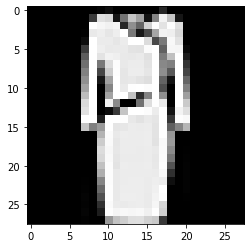

In [72]:
plot_image(59997)

In [10]:
sampleDF = pd.DataFrame(data = trainX.reshape(60000,28*28))
sampleDF

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0,0,0,0,...,119,114,130,76,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,22,...,0,0,1,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,33,96,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59997,0,0,0,0,0,0,0,0,0,5,...,0,0,0,0,0,0,0,0,0,0
59998,0,0,0,0,0,0,0,0,0,0,...,66,54,50,5,0,1,0,0,0,0


In [11]:
labelDF = pd.DataFrame(data = trainy, columns = ["Label"])
labelDF

,Label
0,9
1,0
2,0
3,3
4,0
...,...
59995,5
59996,1
59997,3
59998,0


In [12]:
print("Sample DataFrame data types\n",sampleDF.dtypes)

Sample DataFrame data types
 0      uint8
1      uint8
2      uint8
3      uint8
4      uint8
       ...  
779    uint8
780    uint8
781    uint8
782    uint8
783    uint8
Length: 784, dtype: object


In [13]:
print("Label DataFrame data types\n",sampleDF.dtypes)
print(labelDF.dtypes)

Label DataFrame data types
 0      uint8
1      uint8
2      uint8
3      uint8
4      uint8
       ...  
779    uint8
780    uint8
781    uint8
782    uint8
783    uint8
Length: 784, dtype: object
Label    uint8
dtype: object


In [14]:
#Concatenate the 2 dataframes into one dataframe we will work with
data = pd.concat([sampleDF, labelDF], axis = 1)

In [15]:
data

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,Label
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9
1,0,0,0,0,0,1,0,0,0,0,...,114,130,76,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,22,...,0,1,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,33,96,...,0,0,0,0,0,0,0,0,0,3
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5
59996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
59997,0,0,0,0,0,0,0,0,0,5,...,0,0,0,0,0,0,0,0,0,3
59998,0,0,0,0,0,0,0,0,0,0,...,54,50,5,0,1,0,0,0,0,0


## Label information
    0 T-shirt/top
    1 Trouser
    2 Pullover
    3 Dress
    4 Coat
    5 Sandal
    6 Shirt
    7 Sneaker
    8 Bag
    9 Ankle boot

In [16]:
data["Label"].value_counts()

9    6000
0    6000
3    6000
2    6000
7    6000
5    6000
1    6000
6    6000
4    6000
8    6000
Name: Label, dtype: int64

## Models

## KNN

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import ConfusionMatrixDisplay

In [19]:
X = data.drop("Label", axis = 1).values

In [20]:
y = data['Label'].values

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15, random_state = 42)

In [22]:
KNN_model = KNeighborsClassifier(n_neighbors = 3)

In [23]:
KNN_model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [24]:
KNN_model.score(X_test, y_test)

0.8485555555555555

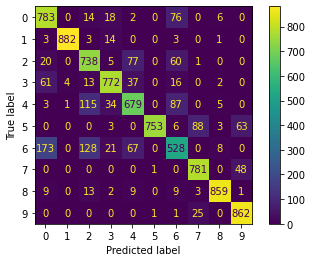

In [25]:
confusion_matrix = ConfusionMatrixDisplay.from_estimator(KNN_model, X_test, y_test)

## Decision Tree

In [26]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

In [27]:
decision_tree_model = DecisionTreeClassifier()

In [28]:
decision_tree_model.fit(X_train, y_train)

DecisionTreeClassifier()

In [29]:
print("The number of leaf nodes in the model:",decision_tree_model.get_n_leaves())

The number of leaf nodes in the model: 4251


In [30]:
print("The depth of the tree in the model:",decision_tree_model.get_depth())

The depth of the tree in the model: 41


In [31]:
decision_tree_model.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [32]:
print("Decision tree model score:",decision_tree_model.score(X_test, y_test))

Decision tree model score: 0.7946666666666666


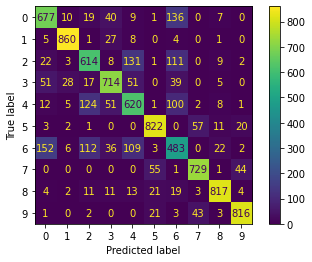

In [33]:
confusion_matrix = ConfusionMatrixDisplay.from_estimator(decision_tree_model, X_test, y_test)

In [34]:
#Cross-validating five times(Any more then that is too slow)
cross_val_score(decision_tree_model, X_train, y_train, cv=5)

array([0.79558824, 0.79637255, 0.7904902 , 0.7922549 , 0.79431373])

0.8801111111111111
[0.88303922 0.88147059 0.88196078 0.88068627 0.8754902 ]
cv_scores mean: 0.8805294117647058


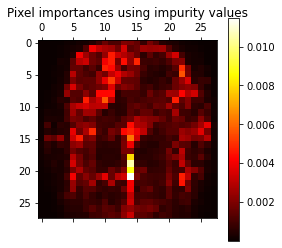

In [35]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(n_estimators=100, random_state=0)
forest.fit(X_train, y_train)

print(forest.score(X_test, y_test))
cv_scores = cross_val_score(forest, X_train, y_train, cv=5)
print(cv_scores)
print("cv_scores mean: " + str(np.mean(cv_scores)))
    
importances = forest.feature_importances_
imp_reshaped = importances.reshape((28, 28))
plt.matshow(imp_reshaped, cmap=plt.cm.hot)
plt.title("Pixel importances using impurity values")
plt.colorbar()
plt.show()

In [68]:
features = pd.Series(forest.feature_importances_, index=range(784))
top_features = features.sort_values(ascending=False).head(600)
print(top_features)
top_features = top_features.index.values.tolist()

602    0.011490
546    0.010521
574    0.008770
518    0.007954
434    0.006213
         ...   
778    0.000440
137    0.000439
492    0.000439
61     0.000432
762    0.000409
Length: 600, dtype: float64


In [69]:
top_data = data.iloc[:, top_features]
top_data = pd.concat([top_data, labelDF], axis = 1)
X = top_data.values
y = top_data['Label'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15, random_state = 42)

In [70]:
forest = RandomForestClassifier(n_estimators=100, random_state=0)
forest.fit(X_train, y_train)
print(forest.score(X_test, y_test))
cv_scores = cross_val_score(forest, X_train, y_train, cv=5)
print(cv_scores)
print("cv_scores mean: " + str(np.mean(cv_scores)))

0.9614444444444444
[0.96686275 0.96921569 0.96843137 0.96588235 0.96833333]
cv_scores mean: 0.9677450980392157
